## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





Frequenza per 10 lanci: 30.00%
Frequenza per 210 lanci: 49.52%
Frequenza per 410 lanci: 51.22%
Frequenza per 610 lanci: 50.66%
Frequenza per 810 lanci: 51.11%
Frequenza per 1010 lanci: 51.29%
Frequenza per 1210 lanci: 49.50%
Frequenza per 1410 lanci: 51.56%
Frequenza per 1610 lanci: 51.49%
Frequenza per 1810 lanci: 48.95%
Frequenza per 2010 lanci: 52.04%
Frequenza per 2210 lanci: 51.81%
Frequenza per 2410 lanci: 50.54%
Frequenza per 2610 lanci: 50.73%
Frequenza per 2810 lanci: 49.36%
Frequenza per 3010 lanci: 49.14%
Frequenza per 3210 lanci: 48.54%
Frequenza per 3410 lanci: 51.09%
Frequenza per 3610 lanci: 48.42%
Frequenza per 3810 lanci: 50.29%
Frequenza per 4010 lanci: 49.63%
Frequenza per 4210 lanci: 49.03%
Frequenza per 4410 lanci: 49.05%
Frequenza per 4610 lanci: 50.04%
Frequenza per 4810 lanci: 49.69%
Frequenza per 5010 lanci: 48.20%
Frequenza per 5210 lanci: 49.52%
Frequenza per 5410 lanci: 49.65%
Frequenza per 5610 lanci: 50.18%
Frequenza per 5810 lanci: 49.35%
Frequenza per 60

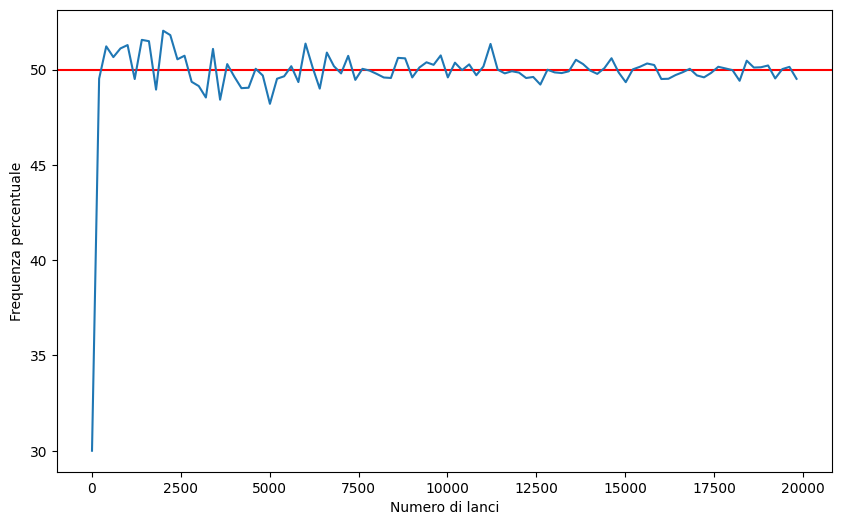

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
def throw_coin(n):
    results = np.random.choice(['H', 'T'], size=n, p=[0.5, 0.5])
    resultsSeries = pd.Series(results)
    heads = resultsSeries.value_counts(normalize=True).get('H', 0) * 100
    # print(f"Frequenza % di teste: {heads:.2f}%")
    return heads

# Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
frequencies = np.array([], dtype=np.float64)
start = 10
end = 20000
step = 200
for n in range(start, end, step):
    heads = throw_coin(n)
    frequencies = np.append(frequencies, heads)
for index, value in enumerate(frequencies):
    print(f"Frequenza per {10 + index * 200} lanci: {value:.2f}%")

print(frequencies)
# Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)
plt.figure(figsize=(10, 6))
plt.axhline(50, color="red")
plt.plot(range(start, end, step), frequencies)
plt.xlabel('Numero di lanci')
plt.ylabel('Frequenza percentuale')
plt.show()

## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

METHOD = "local"

if METHOD=="remote":
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    df = pd.read_csv(url)
elif METHOD=="local":
    df = pd.read_csv("localdataset/titanic.csv")

Righe: 714 | Colonne: 12
Valori duplicati: 0
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


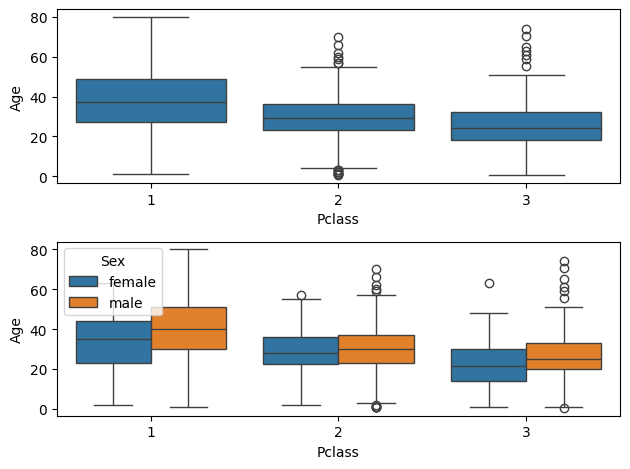

In [29]:
print(f"Righe: {df.shape[0]} | Colonne: {df.shape[1]}")
# for col in df.columns:
#     print(f"{col}: {sum(df[col].isna())}")

EmbarkedMode = df["Embarked"].notna().mode()
df.fillna({"Embarked": df["Embarked"].dropna().mode()[0]}, inplace=True)
df = df.dropna(subset=["Age"])
print(f"Valori duplicati: {df.duplicated().sum()}")

print(df.groupby("Pclass")["Age"].mean())

fig, ax = plt.subplots(2, 1)

sns.boxplot(data=df, x="Pclass", y="Age", ax=ax[0])
sns.boxplot(data=df, x="Pclass", y="Age", hue="Sex", ax=ax[1])
plt.tight_layout()
df

## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

METHOD = "local"

if METHOD=="remote":
    url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
    df = pd.read_csv(url)
elif METHOD=="local":
    df = pd.read_csv("localdataset/iris.csv")

df.dropna(inplace=True) # NA omessi anche se non presenti

In [42]:
for s in df["species"].unique():
    print(f'{s}: {df[df["species"]==s].shape[0]}')

setosa: 50
versicolor: 50
virginica: 50


In [71]:
df.groupby("species")["petal_length"].mean()

species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64

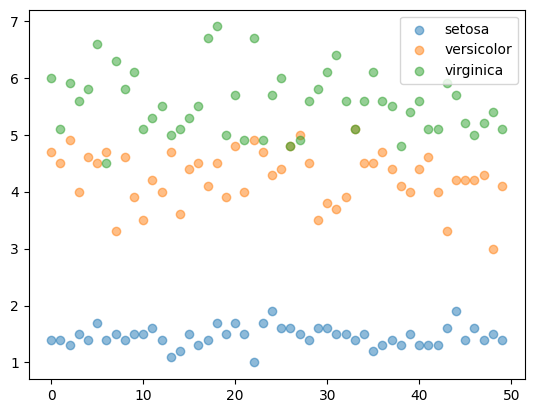

In [ ]:
for s in df["species"].unique():
    plt.scatter(np.arange(df[df["species"]==s].shape[0]), df[df["species"]==s]["petal_length"], alpha=0.5, label=s)
plt.legend()

In [86]:
# approssimando a un ellisse:
df["petal_area"] = np.pi * df["petal_length"]/2 + df["petal_width"]/2
df.groupby("species")["petal_area"].mean()

species
setosa        2.419504
versicolor    7.354592
virginica     9.734061
Name: petal_area, dtype: float64

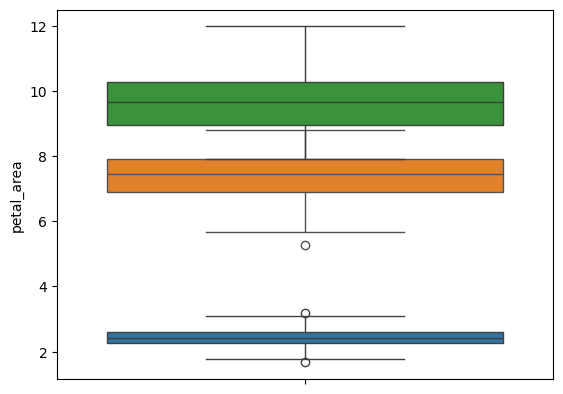

In [89]:
# fig = plt.figure(1, (3, 4))
for s in df["species"].unique():
    sns.boxplot(df[df["species"]==s]["petal_area"])